In [6]:
import pandas as pd
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
model = keras.Sequential()
os.chdir("C:/Users/33781/Desktop/Projet_dogcat/train")

# 1. Préparation des données

In [7]:
liste=sorted(sorted(os.listdir(), key=lambda x: int(x.split('.')[1])),key=lambda x: x.split('.')[0]) #Trier les images par numéro et par nom

In [ ]:
mean_data = []
for img_file in liste:
    mean_data.append(np.mean(np.array(Image.open(img_file).resize((64, 64)), dtype=np.float64), axis=2))
data = np.array(mean_data)/255

In [ ]:
np.save('C:/Users/33781/Desktop/Projet_dogcat/mean64.npy', data)

# 2. Mélange des Images

In [9]:
data=np.load('C:/Users/33781/Desktop/Projet_dogcat/mean64.npy')

In [10]:
tf_data = tf.convert_to_tensor(data, dtype=tf.float64)
tf_labels =tf.convert_to_tensor(np.concatenate((np.zeros(12500),np.ones(12500))))

In [11]:
shuffled_indices = tf.range(tf.shape(tf_data)[0], dtype=tf.int32)
shuffled_indices = tf.random.shuffle(shuffled_indices, seed=0)
tf_data = tf.gather(tf_data, shuffled_indices)
tf_labels = tf.gather(tf_labels, shuffled_indices)

# 3. Séparation en train/ validation/ test

In [12]:
X_train=tf_data[:10000]
y_train=tf_labels[:10000]
X_validation=tf_data[10000:20000]
y_validation=tf_labels[10000:20000]
X_test=tf_data[20000:25000]
y_test=tf_labels[20000:25000]

# 4. Perceptron Multi Couche

In [47]:
model1 = keras.models. Sequential()
model1.add(keras.layers.Flatten (input_shape=[64, 64])) #Couche d'entré pour applatir les image en vecteur de 4096 valeurs 
# Couches de type dense, tous les neuronnes sont connecter avec les neuronnes de la couches précédentes
model1.add(keras.layers.Dense(300, activation="relu")) # Une première couche caché avec 300 neuronnes et une fonction d'activation de type relu
model1.add(keras.layers.Dense (150, activation="relu")) # Une deuxieme couche caché avec 150 neuronnes et une fonction d'activation de type relu
model1.add(keras.layers.Dense(1, activation="sigmoid")) # Une couche de sorti avec 2 neuronnes et une fonctions d'activation de type sigmoid

In [48]:
model1.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 4096)              0         
                                                                 
 dense_17 (Dense)            (None, 300)               1229100   
                                                                 
 dense_18 (Dense)            (None, 150)               45150     
                                                                 
 dense_19 (Dense)            (None, 1)                 151       
                                                                 
Total params: 1274401 (4.86 MB)
Trainable params: 1274401 (4.86 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [49]:
model1.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy']) 

In [59]:
stop=keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True) #Si le val_loss ne s'améliore pas 3 fois on arrête l'aprentissage et on garde les meilleurs poids
model1_fit=model1.fit(X_train,y_train,epochs=40,validation_data=(X_validation,y_validation),callbacks=[stop])

Epoch 1/40
313/313 [==============================] - 9s 28ms/step - loss: 0.4260 - accuracy: 0.8062 - val_loss: 0.7743 - val_accuracy: 0.6159
Epoch 2/40
313/313 [==============================] - 7s 21ms/step - loss: 0.4170 - accuracy: 0.8157 - val_loss: 0.6973 - val_accuracy: 0.6326
Epoch 3/40
313/313 [==============================] - 7s 22ms/step - loss: 0.4145 - accuracy: 0.8130 - val_loss: 0.7949 - val_accuracy: 0.6135
Epoch 4/40
313/313 [==============================] - 7s 21ms/step - loss: 0.4072 - accuracy: 0.8191 - val_loss: 0.7278 - val_accuracy: 0.6265
Epoch 5/40
313/313 [==============================] - 7s 21ms/step - loss: 0.3988 - accuracy: 0.8225 - val_loss: 0.7467 - val_accuracy: 0.6199


Le modèle prédit bien 78% de nos données d'entrainement et 63% de nos données de validation

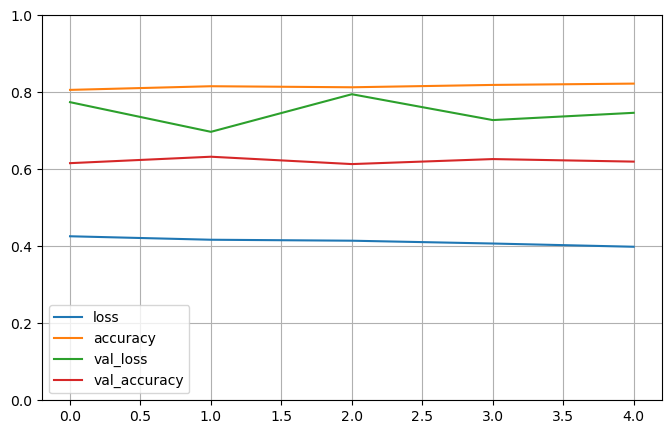

In [60]:
pd.DataFrame(model1_fit.history).plot(figsize=(8,5))
plt.grid()
plt.gca().set_ylim(0,1)
plt.show()

In [68]:
print(model1.evaluate(X_train,y_train))
print(model1.evaluate(X_validation,y_validation))
print(model1.evaluate(X_test,y_test))

313/313 [==============================] - 2s 6ms/step - loss: 0.3884 - accuracy: 0.8373
[0.3883599042892456, 0.8373000025749207]
313/313 [==============================] - 2s 5ms/step - loss: 0.6973 - accuracy: 0.6326
[0.6972784996032715, 0.6326000094413757]
157/157 [==============================] - 1s 6ms/step - loss: 0.6745 - accuracy: 0.6378
[0.6744796633720398, 0.6377999782562256]


Le modèle prédit bien 64% de nos données de test, il fait un peu mieux que le hasard

# 4. CNN

In [62]:
model2 = keras.models.Sequential()
model2.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1))) #couches de convolution avec une activation ReLU, utilisées pour extraire des caractéristiques de l'image
model2.add(keras.layers.MaxPooling2D((2, 2))) #couches de max pooling pour réduire la dimensionnalité de la sortie des couches de convolution.
model2.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(keras.layers.MaxPooling2D((2, 2)))
model2.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(keras.layers.MaxPooling2D((2, 2)))
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(512, activation='relu'))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [63]:
model2.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_30 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_31 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 6, 6, 128)       

In [64]:
model2.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy']) 

In [65]:
model2_fit=model2.fit(X_train,y_train,epochs=40,validation_data=(X_validation,y_validation),callbacks=[stop])

Epoch 1/40
313/313 [==============================] - 73s 226ms/step - loss: 0.6923 - accuracy: 0.5242 - val_loss: 0.6907 - val_accuracy: 0.5527
Epoch 2/40
313/313 [==============================] - 79s 252ms/step - loss: 0.6900 - accuracy: 0.5483 - val_loss: 0.6887 - val_accuracy: 0.5609
Epoch 3/40
313/313 [==============================] - 74s 237ms/step - loss: 0.6881 - accuracy: 0.5648 - val_loss: 0.6870 - val_accuracy: 0.5844
Epoch 4/40
313/313 [==============================] - 81s 258ms/step - loss: 0.6858 - accuracy: 0.5767 - val_loss: 0.6857 - val_accuracy: 0.5546
Epoch 5/40
313/313 [==============================] - 78s 251ms/step - loss: 0.6828 - accuracy: 0.5741 - val_loss: 0.6831 - val_accuracy: 0.5581
Epoch 6/40
313/313 [==============================] - 72s 231ms/step - loss: 0.6792 - accuracy: 0.5790 - val_loss: 0.6807 - val_accuracy: 0.5543
Epoch 7/40
313/313 [==============================] - 74s 237ms/step - loss: 0.6747 - accuracy: 0.5875 - val_loss: 0.6715 - val_ac

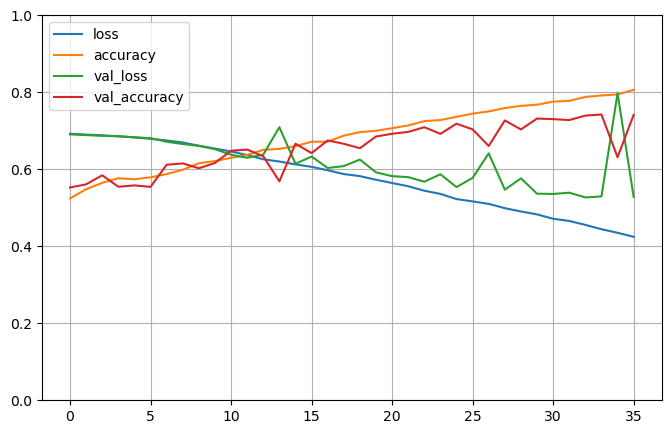

In [66]:
pd.DataFrame(model2_fit.history).plot(figsize=(8,5))
plt.grid()
plt.gca().set_ylim(0,1)
plt.show()

In [67]:
print(model2.evaluate(X_train,y_train))
print(model2.evaluate(X_validation,y_validation))
print(model2.evaluate(X_test,y_test))

313/313 [==============================] - 11s 36ms/step - loss: 0.4257 - accuracy: 0.8063
[0.4256693720817566, 0.8062999844551086]
313/313 [==============================] - 14s 43ms/step - loss: 0.5269 - accuracy: 0.7394
[0.5269145369529724, 0.7394000291824341]
157/157 [==============================] - 8s 52ms/step - loss: 0.5172 - accuracy: 0.7478
[0.517244279384613, 0.7477999925613403]


# CNN avec Dropout pour combatre le suraprentissage

In [69]:
model3 = keras.models. Sequential()
model3.add(keras.layers.Conv2D(32,(3,3),padding="same",activation='relu',input_shape=(64,64,1)))
model3.add(keras.layers.Conv2D(32,(3,3),activation='relu'))
model3.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model3.add(keras.layers.Dropout(0.25)) # couches Dropout, qui sont utilisées pour éviter le surajustement en désactivant aléatoirement certains neurones pendant l'entraînement.
model3.add(keras.layers.Conv2D(64,(3,3),padding='same',activation='relu'))
model3.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model3.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model3.add(keras.layers.Dropout(0.25))
model3.add(keras.layers.Flatten())
model3.add(keras.layers.Dense(512,activation='relu'))
model3.add(keras.layers.Dropout(0.5))
model3.add(keras.layers.Dense(1, activation="sigmoid")) 

In [70]:
model3.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 64, 64, 32)        320       
                                                                 
 conv2d_33 (Conv2D)          (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_12 (Dropout)        (None, 31, 31, 32)        0         
                                                                 
 conv2d_34 (Conv2D)          (None, 31, 31, 64)        18496     
                                                                 
 conv2d_35 (Conv2D)          (None, 29, 29, 64)        36928     
                                                     

In [71]:
model3.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [72]:
model3_fit=model.fit(X_train,y_train,epochs=40,validation_data=(X_validation,y_validation),callbacks=[stop])

Epoch 1/40
313/313 [==============================] - 64s 204ms/step - loss: 0.6530 - accuracy: 0.6203 - val_loss: 0.7447 - val_accuracy: 0.5027
Epoch 2/40
313/313 [==============================] - 67s 215ms/step - loss: 0.6450 - accuracy: 0.6283 - val_loss: 0.6435 - val_accuracy: 0.6443
Epoch 3/40
313/313 [==============================] - 68s 219ms/step - loss: 0.6373 - accuracy: 0.6365 - val_loss: 0.6672 - val_accuracy: 0.5931
Epoch 4/40
313/313 [==============================] - 68s 217ms/step - loss: 0.6270 - accuracy: 0.6535 - val_loss: 0.6424 - val_accuracy: 0.6289
Epoch 5/40
313/313 [==============================] - 75s 240ms/step - loss: 0.6215 - accuracy: 0.6538 - val_loss: 0.6237 - val_accuracy: 0.6575
Epoch 6/40
313/313 [==============================] - 80s 254ms/step - loss: 0.6105 - accuracy: 0.6671 - val_loss: 0.6164 - val_accuracy: 0.6637
Epoch 7/40
313/313 [==============================] - 82s 264ms/step - loss: 0.6018 - accuracy: 0.6789 - val_loss: 0.6120 - val_ac

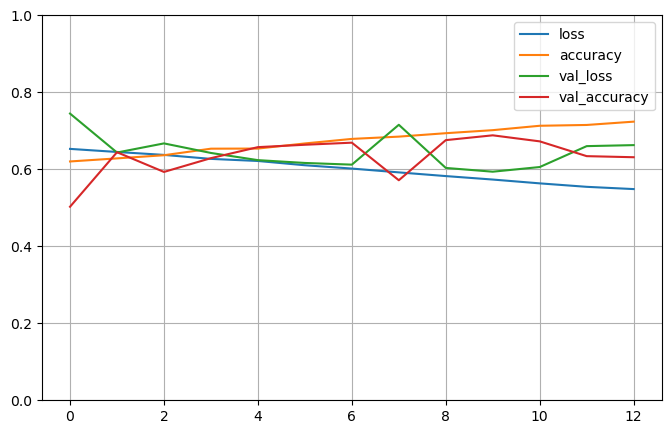

In [73]:
pd.DataFrame(model3_fit.history).plot(figsize=(8,5))
plt.grid()
plt.gca().set_ylim(0,1)
plt.show()

In [74]:
print(model3.evaluate(X_train,y_train))
print(model3.evaluate(X_validation,y_validation))
print(model3.evaluate(X_test,y_test))

313/313 [==============================] - 39s 125ms/step - loss: 0.6931 - accuracy: 0.5033
[0.6931055188179016, 0.5033000111579895]
313/313 [==============================] - 38s 123ms/step - loss: 0.6930 - accuracy: 0.5132
[0.693047285079956, 0.5131999850273132]
157/157 [==============================] - 19s 119ms/step - loss: 0.6931 - accuracy: 0.5028
[0.6931315064430237, 0.5027999877929688]
